In [63]:
import numpy as np
import os
import pandas as pd

print(os.listdir('C:/Users/MikeK/GoIT'))
df = pd.read_csv('C:/Users/MikeK/GoIT/Housing.csv')

['.ipynb_checkpoints', '2017_jun_final - 2017_jun_final.csv', 'bestsellers with categories.csv', 'Housing.csv', 'HW1.ipynb', 'Hw2.1.ipynb', 'Hw2.2.ipynb', 'Hw2.3.ipynb', 'Hw3.ipynb', 'processed_data.csv', 'Untitled.ipynb']


In [65]:
# напишіть функцію гіпотези лінійної регресії у векторному вигляді
def hypothesis(X, w):
    """
    Функція для обчислення гіпотези лінійної регресії у векторному вигляді.
    
    Parameters:
    X (numpy.ndarray): Матриця ознак (n x m), де n — кількість зразків, m — кількість ознак.
    w (numpy.ndarray): Вектор параметрів (m x 1).

    Returns:
    numpy.ndarray: Прогнозовані значення (n x 1).
    """
    return np.dot(X, w)

In [67]:
# створіть функцію для обчислення функції втрат у векторному вигляді
def compute_cost(X, y, w):
    """
    Функція для обчислення функції втрат (MSE — середньоквадратична похибка) у векторному вигляді.
    
    Parameters:
    X (numpy.ndarray): Матриця ознак (n x m).
    y (numpy.ndarray): Вектор справжніх значень (n x 1).
    w (numpy.ndarray): Вектор параметрів (m x 1).

    Returns:
    float: Значення функції втрат.
    """
    n = len(y)
    predictions = hypothesis(X, w)
    cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return cost

In [83]:
# реалізуйте один крок градієнтного спуску
def gradient_step(X, y, w, learning_rate):
    """
    Функція для виконання одного кроку градієнтного спуску.
    
    Parameters:
    X (numpy.ndarray): Матриця ознак (n x m).
    y (numpy.ndarray): Вектор справжніх значень (n x 1).
    w (numpy.ndarray): Вектор параметрів (m x 1).
    learning_rate (float): Розмір кроку градієнтного спуску.

    Returns:
    numpy.ndarray: Оновлений вектор параметрів (m x 1).
    """
    m = len(y)
    predictions = hypothesis(X, w)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    w = w - learning_rate * gradient
    return w

In [71]:
# знайдіть найкращі параметри w⃗w для датасету використовуючи написані вами функції, 
# прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded[['area', 'bathrooms', 'bedrooms']].values
y = df_encoded['price'].values.reshape(-1, 1)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [85]:
# Ініціалізація параметрів
w = np.zeros((X_b.shape[1], 1))
learning_rate = 0.01
n_iterations = 1000

# Виконання градієнтного спуску
for iteration in range(n_iterations):
    w = gradient_step(X_b, y, w, learning_rate)

print("Найкращі параметри w, знайдені за допомогою градієнтного спуску:")
print(w)

Найкращі параметри w, знайдені за допомогою градієнтного спуску:
[[4766523.46205873]
 [ 821199.26709864]
 [ 695515.99623791]
 [ 300296.28560637]]


In [87]:
# знайдіть ці ж параметри за допомогою аналітичного рішення
w_analytical = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Параметри w, знайдені аналітично:")
print(w_analytical)


Параметри w, знайдені аналітично:
[[4766729.24770642]
 [ 821214.14349519]
 [ 695808.52272537]
 [ 299983.57107963]]


In [89]:
# для перевірки спрогнозованих значень, використайте LinearRegression з бібліотеки scikit-learn 
# та порівняйте результати

from sklearn.linear_model import LinearRegression

# Створення та навчання моделі
model = LinearRegression()
model.fit(X, y)

# Отримання параметрів (коефіцієнтів та вільного члена)
intercept_sklearn = model.intercept_
coef_sklearn = model.coef_

# Виведення параметрів
print("Параметри w, знайдені за допомогою LinearRegression з scikit-learn:")
print("Вільний член:", intercept_sklearn)
print("Коефіцієнти:", coef_sklearn)

# Порівняння результатів
print("\nПорівняння параметрів:")
print("Градієнтний спуск:", w.flatten())
print("Аналітичне рішення:", w_analytical.flatten())
print("scikit-learn:", np.r_[intercept_sklearn, coef_sklearn.flatten()])

Параметри w, знайдені за допомогою LinearRegression з scikit-learn:
Вільний член: [4766729.24770642]
Коефіцієнти: [[821214.14349519 695808.52272537 299983.57107963]]

Порівняння параметрів:
Градієнтний спуск: [4766523.46205873  821199.26709864  695515.99623791  300296.28560637]
Аналітичне рішення: [4766729.24770642  821214.14349519  695808.52272537  299983.57107963]
scikit-learn: [4766729.24770642  821214.14349519  695808.52272537  299983.57107963]


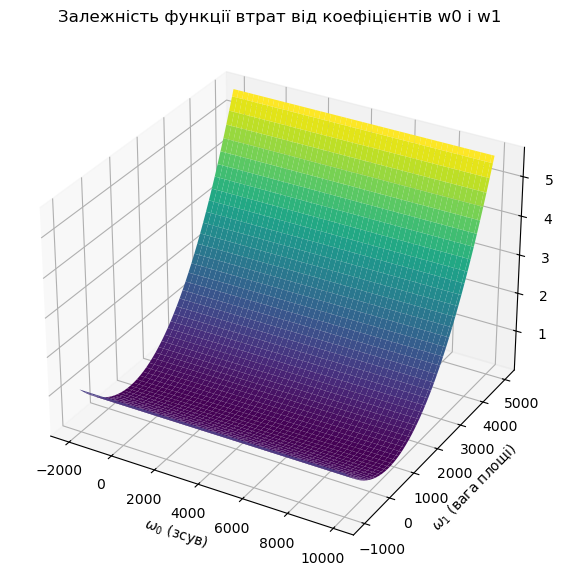

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Припустимо, що X – це ваші дані, наприклад, площа будинку
X = df[['area']].values  # Використання площі будинку як вхідного значення
y = df['price'].values  # Цільова змінна - ціна

# Параметри для сітки коефіцієнтів
w0 = np.linspace(-2000, 10000, 100)  # Діапазон для w0
w1 = np.linspace(-1000, 5000, 100)  # Діапазон для w1

W0, W1 = np.meshgrid(w0, w1)

# Функція втрат (MSE) для кожної комбінації коефіцієнтів
def compute_loss(X, y, w0, w1):
    predictions = w0 + w1 * X  # Лінійне рівняння для прогнозу
    return np.mean((predictions - y) ** 2)  # MSE

# Обчислення значень функції втрат для кожної комбінації w0 та w1
loss = np.array([[compute_loss(X, y, w0_i, w1_j) for w0_i in w0] for w1_j in w1])

# Побудова графіку
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Відображення поверхні
ax.plot_surface(W0, W1, loss, cmap='viridis', edgecolor='none')

# Налаштування осей
ax.set_title('Залежність функції втрат від коефіцієнтів w0 і w1')
ax.set_xlabel(r'$\omega_0$ (зсув)')
ax.set_ylabel(r'$\omega_1$ (вага площі)')
ax.set_zlabel('Функція втрат (MSE)')

plt.show()
